## Dataload

## api 키 관련
dailyPriceByCategoryList : 도소매 가격정보
p_product_cls_code : 01소매 , 02도매
p_regday : 날짜
p_item_category_code : (100:식량작물, 200:채소류, 300:특용작물, 400:과일류, 500:축산물, 600:수산물)

In [54]:
df['item_name'].unique()

array(['쌀', '찹쌀', '콩', '팥', '녹두', '메밀', '고구마', '감자', '배추', '양배추', '시금치',
       '상추', '얼갈이배추', '수박', '참외', '오이', '호박', '토마토', '딸기', '무', '당근',
       '열무', '건고추', '풋고추', '붉은고추', '피마늘', '양파', '파', '생강', '미나리', '깻잎',
       '피망', '파프리카', '멜론', '깐마늘(국산)', '알배기배추', '브로콜리', '방울토마토', '참깨',
       '들깨', '땅콩', '느타리버섯', '팽이버섯', '새송이버섯', '사과', '배', '바나나', '파인애플',
       '오렌지', '레몬', '체리', '망고', '소', '돼지', '수입 소고기', '수입 돼지고기', '닭', '계란',
       '우유', '고등어', '갈치', '명태', '삼치', '물오징어', '건멸치', '북어', '건오징어', '김',
       '건미역', '굴', '전복', '새우'], dtype=object)

In [72]:
key = os.getenv('key')
id = os.getenv('id')
url = f'http://www.kamis.or.kr/service/price/xml.do?action=dailySalesList&p_cert_key={key}&p_cert_id={id}&p_returntype=json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data['price'])

In [ ]:
key = os.getenv('key')
id = os.getenv('id')
def Domea_data_load(): # 일일 도매가 불러오기
    today_date = datetime.now().strftime('%Y-%m-%d')
    domea_data = []
    somea_data = []
    for category_code in ['02', '01']:
        for a in ['100', '200', '300', '400', '500', '600']:
            url = f'http://www.kamis.or.kr/service/price/xml.do?action=dailyPriceByCategoryList&p_product_cls_code={category_code}&p_regday={today_date}&p_item_category_code={a}&p_cert_key={key}&p_cert_id={id}&p_returntype=json'
            response = requests.get(url)
            data = response.json()
            if category_code == '02':
                domea_data.extend(data['data']['item'])
            else:
                somea_data.extend(data['data']['item'])
    return pd.DataFrame(domea_data) , pd.DataFrame(somea_data) 
domea_df, somea_df = Domea_data_load()

In [80]:
def Data_load2():
    basic_data = []
    country_data = []
    for action in ['dailySalesList', 'dailyCountyList']:
        if action == 'dailySalesList':
            url = f'http://www.kamis.or.kr/service/price/xml.do?action={action}&p_cert_key={key}&p_cert_id={id}&p_returntype=json'
            response = requests.get(url)
            data = response.json()
            basic_data.extend(data['price'])
        else:
            for county in [1101,2100,2200,2300,2401,2501,2601,3111,3211,3311,3511,3711,3911,3113,3613,3714,3814,3145]:
                url = f'http://www.kamis.or.kr/service/price/xml.do?action={action}&p_cert_key={key}&p_cert_id={id}&p_returntype=json&p_countycode={county}'
                response = requests.get(url)
                data = response.json()
                country_data.extend(data['price'])
        
    return pd.DataFrame(basic_data) , pd.DataFrame(country_data) 

basic_data, country_data = Data_load2()
print(basic_data,country_data)

    product_cls_code product_cls_name category_code category_name productno  \
0                 01               소매           100          식량작물       272   
1                 01               소매           100          식량작물      1537   
2                 01               소매           100          식량작물       274   
3                 01               소매           100          식량작물       275   
4                 01               소매           100          식량작물       277   
..               ...              ...           ...           ...       ...   
208               02               도매           600           수산물       265   
209               02               도매           600           수산물       267   
210               02               도매           600           수산물       937   
211               02               도매           600           수산물       938   
212               02               도매           600           수산물      2801   

    lastest_day productName   item_name  unit day1 

In [81]:
basic_datas

,product_cls_code,product_cls_name,category_code,category_name,productno,lastest_day,productName,item_name,unit,day1,dpr1,day2,dpr2,day3,dpr3,day4,dpr4,direction,value
0,01,소매,100,식량작물,272,2024-03-21,쌀/20kg,쌀/20kg,20kg,당일,"51,532",1일전,"53,512",1개월전,"55,409",1년전,"50,922",0,3.7
1,01,소매,100,식량작물,1537,2024-03-21,쌀/10kg,쌀/10kg,10kg,당일,"28,755",1일전,"28,515",1개월전,"28,852",1년전,[],1,0.8
2,01,소매,100,식량작물,274,2024-03-21,찹쌀/일반계,찹쌀/일반계,1kg,당일,"3,891",1일전,"3,891",1개월전,"3,669",1년전,"3,653",2,0.0
3,01,소매,100,식량작물,275,2024-03-21,콩/흰 콩(국산),콩/흰 콩(국산),500g,당일,"5,354",1일전,"5,354",1개월전,"5,085",1년전,"5,517",2,0.0
4,01,소매,100,식량작물,277,2024-03-21,팥/붉은 팥(국산),팥/붉은 팥(국산),500g,당일,"8,883",1일전,"8,883",1개월전,"8,325",1년전,"7,831",2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,02,도매,600,수산물,265,2024-03-21,건미역/건미역,건미역/건미역,1kg,당일,"13,900",1일전,"13,900",1개월전,"13,928",1년전,"13,320",2,0.0
209,02,도매,600,수산물,267,2024-03-21,굴/굴,굴/굴,1kg,당일,"11,946",1일전,"11,946",1개월전,"12,428",1년전,"12,640",2,0.0
210,02,도매,600,수산물,937,2024-03-21,전복/전복,전복/전복,1kg,당일,"32,800",1일전,"32,800",1개월전,"33,184",1년전,"34,400",2,0.0
211,02,도매,600,수산물,938,2024-03-21,새우/흰다리(수입),새우/흰다리(수입),2kg,당일,"25,840",1일전,"25,840",1개월전,"25,780",1년전,"26,800",2,0.0


In [85]:
country_data

,county_code,county_name,product_cls_code,product_cls_name,category_code,category_name,productno,lastest_day,productName,item_name,...,day1,dpr1,day2,dpr2,day3,dpr3,day4,dpr4,direction,value
0,1101,서울,"[01, 01]","[소매, 소매]",100,식량작물,272,2024-03-21,쌀/20kg,쌀/20kg,...,당일,"51,189",1일전,"52,522",1개월전,"54,744",1년전,"49,189",0,2.5
1,1101,서울,"[01, 01]","[소매, 소매]",100,식량작물,1537,2024-03-21,쌀/10kg,쌀/10kg,...,당일,"29,331",1일전,"29,109",1개월전,"28,887",1년전,[],1,0.8
2,1101,서울,"[01, 01]","[소매, 소매]",100,식량작물,274,2024-03-21,찹쌀/일반계,찹쌀/일반계,...,당일,"3,911",1일전,"3,911",1개월전,"3,643",1년전,"3,539",2,0.0
3,1101,서울,"[01, 01]","[소매, 소매]",100,식량작물,275,2024-03-21,콩/흰 콩(국산),콩/흰 콩(국산),...,당일,"5,313",1일전,"5,313",1개월전,"5,228",1년전,"6,367",2,0.0
4,1101,서울,"[01, 01]","[소매, 소매]",100,식량작물,277,2024-03-21,팥/붉은 팥(국산),팥/붉은 팥(국산),...,당일,"8,859",1일전,"8,859",1개월전,"8,388",1년전,"8,054",2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,3145,용인,"[01, 01]","[소매, 소매]",800,식품,1580,2024-03-21,고추장/해찬들 우리쌀로만든 태양초고추장 1kg,고추장/해찬들 우리쌀로만든 태양초고추장 1kg,...,당일,"9,600",1일전,"9,600",1개월전,"19,200",1년전,[],2,0.0
2124,3145,용인,"[01, 01]","[소매, 소매]",800,식품,1579,2024-03-21,김치/대상 종가집 포기김치 3.3kg,김치/대상 종가집 포기김치 3.3kg,...,당일,"33,800",1일전,"33,800",1개월전,"33,800",1년전,[],2,0.0
2125,3145,용인,"[01, 01]","[소매, 소매]",800,식품,1578,2024-03-21,두부/풀무원 국산콩 300g×2,두부/풀무원 국산콩 300g×2,...,당일,"5,480",1일전,"5,480",1개월전,"5,480",1년전,[],2,0.0
2126,3145,용인,"[01, 01]","[소매, 소매]",800,식품,1577,2024-03-21,즉석밥/CJ 햇반 백미밥 210g×8개,즉석밥/CJ 햇반 백미밥 210g×8개,...,당일,"10,800",1일전,"10,800",1개월전,"10,800",1년전,[],2,0.0


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
c:\Users\User\document\공부\project\sijang_project\myvenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
c:\Users\User\document\공부\project\sijang_project\myvenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
c:\Users\User\document\공부\project\sijang_project\myvenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
c:\Users\User\document\공부\project\sijang_project\myvenv\Lib\site-packages\IPython\core

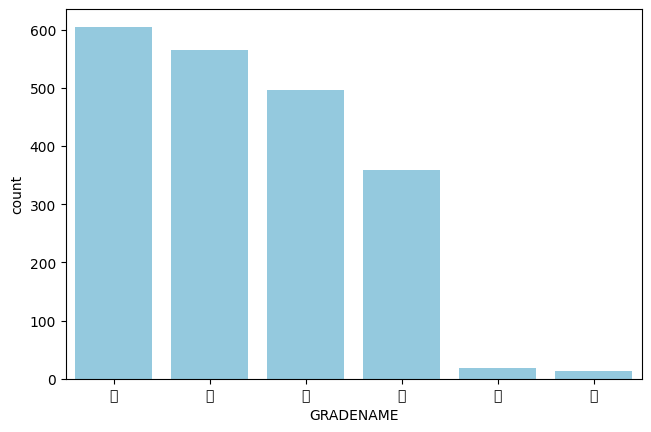

In [15]:
# fig, axs = plt.subplots(2, 2, figsize=(30, 8))
sns.countplot(x='GRADENAME',data=df,color="skyblue")
axs[0,0].set_title("접속 순위")
axs[0,0].set_xlabel("유저 이름")
axs[0,0].set_ylabel("접속 횟수")

plt.subplots_adjust(left=0.05, right=0.95 , hspace=0.475 , wspace=0.13)
# plt.savefig('time_chat.png')
plt.show()    
plt.close()

In [3]:
df['GRADENAME'].value_counts()

GRADENAME
상    605
중    565
하    497
특    359
대     18
소     13
Name: count, dtype: int64

In [2]:
def category(item):
  su_list = ["갈치", "고등어", "멸치", "조개", "게", "새우", "오징어", "낙지", "문어", "해삼", "고래", "바다", "물고기" , '활' , '가자미' , '명태' , '어','홍합','소라','굴',
             "근대", "깐 바지락", "냉태", "대구", "달래", "매생이", "머위대", "삼치",'조기' ,"부세", "주꾸미"]

  ve_list = ["가지", "감자", "양파", "배추", "무", "당근", "토마토", "오이", "버섯", "고추", "피망", "깻잎", "시금치", "열무", "콜리플라워", "브로콜리", "아스파라거스",
              "양배추", "샐러리", "케일", "깻잎", "깻잎순", "쑥갓" ,'고구마','고수','로메인','호박','미나리','콜라비','미더덕','아귀','칼리',"김", 
              "깐마늘", "냉이", "노랑 파프리카", "당귀잎", "대파", "동죽", "레드 치커리","생표고", "나물" , '파'
                 "로케트 루꼴라", "매생이", "머위대", "바실",  "부추", "블루베리", "비타민","비트", "빨강 파프리카", "상추", "생표고", "셀러리", "아욱","양송이", "부추",
                 "오만둥이", "적근대", "적상추", "쪽파", "쫑상추",  "참두릅", "청경채",
                 "취나물", "치커리",'루꼴라']
  fru_list = ['귤','배','사과','샤인머스캣','파인애플','수박','딸기','멜론','바나나',"단감", "만감", "참외", "오렌지"]

  # 품목명에 키워드 포함 여부 확인
  for keyword in su_list:
    if keyword in item:
      return "수산물"
  for keyword in ve_list:
    if keyword in item:
      return "야채"
  for keyword in fru_list:
    if keyword in item:
      return "과일"
  return "기타"

df['category'] = df['PUMNAME'].apply(category)
df

,PUMNAME,GRADENAME,UNITQTY,UNITNAME,MAXPRICE,MINPRICE,AVGPRICE,INVEST_DT,kg당 평균 가격,category
0,(냉)갈치,상,10.0,kg상자,350000.0,26667.0,90770.0,20240314,9077,수산물
1,(냉)갈치,중,10.0,kg상자,26667.0,25000.0,26276.0,20240314,2627,수산물
2,(냉)고등어,상,10.0,kg상자,80000.0,27000.0,40154.0,20240314,4015,수산물
4,(냉)고등어 수입,상,10.0,kg상자,52000.0,32750.0,35325.0,20240314,3532,수산물
8,(선)갈치,상,5.0,kg상자,190000.0,180000.0,185469.0,20240314,37093,수산물
...,...,...,...,...,...,...,...,...,...,...
2011,활 방어(자연),중,1.0,kg,9000.0,4000.0,6328.0,20240314,6328,수산물
2012,활 방어(자연),소,1.0,kg,4000.0,3000.0,3590.0,20240314,3590,수산물
2017,활 전복(양식),상,1.0,kg,31000.0,21000.0,25648.0,20240314,25648,수산물
2018,활 전복(양식),중,1.0,kg,21000.0,13000.0,18123.0,20240314,18123,수산물


In [3]:
df_test = df[['PUMNAME','UNITNAME','category']]
lst = list(df[df['category']=='기타']['PUMNAME'].values)
lst

['그린키위 국산',
 '그린키위 국산',
 '그린키위 국산',
 '그린키위 국산',
 '머위잎',
 '머위잎',
 '머위잎',
 '파슬리',
 '파슬리',
 '파슬리']

In [4]:
X = df.drop('category',axis=1)
Y = df[['category']]
X.head()

,PUMNAME,GRADENAME,UNITQTY,UNITNAME,MAXPRICE,MINPRICE,AVGPRICE,INVEST_DT,kg당 평균 가격
0,(냉)갈치,상,10.0,kg상자,350000.0,26667.0,90770.0,20240314,9077
1,(냉)갈치,중,10.0,kg상자,26667.0,25000.0,26276.0,20240314,2627
2,(냉)고등어,상,10.0,kg상자,80000.0,27000.0,40154.0,20240314,4015
4,(냉)고등어 수입,상,10.0,kg상자,52000.0,32750.0,35325.0,20240314,3532
8,(선)갈치,상,5.0,kg상자,190000.0,180000.0,185469.0,20240314,37093


In [5]:
x_train = X[~X['PUMNAME'].isin(lst)]
y_train =  Y[~(Y['category']=='기타')]
test = X[X['PUMNAME'].isin(lst)]

In [6]:
x_train.shape , y_train.shape , test.shape 

((773, 9), (773, 1), (10, 9))

In [7]:
from sklearn.preprocessing import LabelEncoder

combined_data = pd.concat([x_train, test], axis=0) 

'''
아래에 붙이는 이유는 필요한 데이터만 추출해서 분리시킨후 아래로 배치 시키려고
따로 train,test로 각각 라벨 인코딩을 적용하면 train에 없는 데이터가 test에 있다고 인코딩이 진행되지 않는다.
(테스트 데이터에 학습 데이터에 없는 카테고리가 포함오류)
'''
cat_col = combined_data.select_dtypes(include='object').columns

le = LabelEncoder()
for column in cat_col:
    combined_data[column] = le.fit_transform(combined_data[column])

x_train_encoded = combined_data[:len(x_train)]
test_encoded = combined_data[len(x_train):]

In [8]:
test

,PUMNAME,GRADENAME,UNITQTY,UNITNAME,MAXPRICE,MINPRICE,AVGPRICE,INVEST_DT,kg당 평균 가격
120,그린키위 국산,특,10.0,kg상자,54000.0,54000.0,54000.0,20240314,5400
121,그린키위 국산,상,10.0,kg상자,54000.0,53000.0,53480.0,20240314,5348
122,그린키위 국산,중,10.0,kg상자,53000.0,48000.0,51378.0,20240314,5137
123,그린키위 국산,하,10.0,kg상자,48000.0,22000.0,36125.0,20240314,3612
638,머위잎,상,4.0,kg상자,44000.0,30000.0,39416.0,20240314,9854
639,머위잎,중,4.0,kg상자,30000.0,27500.0,28680.0,20240314,7170
640,머위잎,하,4.0,kg상자,27500.0,23000.0,24715.0,20240314,6178
982,파슬리,상,4.0,kg상자,13000.0,12500.0,12667.0,20240314,3166
983,파슬리,중,4.0,kg상자,12500.0,11000.0,11995.0,20240314,2998
984,파슬리,하,4.0,kg상자,11000.0,8000.0,9600.0,20240314,2400


In [9]:
def category(item):
  fru_list = ["키위"]
  ve_list = ['머위잎','파슬리']

  # 품목명에 키워드 포함 여부 확인
  for keyword in ve_list:
    if keyword in item:
      return "야채"
  for keyword in fru_list:
    if keyword in item:
      return "과일"
    
test_copy = test.copy()
test_copy.loc[:, 'category'] = test['PUMNAME'].apply(category)
y_test = test_copy['category']

In [10]:
Y = df['category']

In [11]:
Y

0       수산물
1       수산물
2       수산물
4       수산물
8       수산물
       ... 
2011    수산물
2012    수산물
2017    수산물
2018    수산물
2021    수산물
Name: category, Length: 783, dtype: object

In [12]:
x_train_encoded.shape , y_train.shape , test_encoded.shape , y_test.shape

((773, 9), (773, 1), (10, 9), (10,))

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
rf_model = RandomForestClassifier()
g_model = GradientBoostingClassifier()
g_model.fit(x_train_encoded, y_train)
pred = g_model.predict(test_encoded)
pred

c:\Users\User\document\공부\project\sijang_project\myvenv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['야채', '야채', '야채', '야채', '과일', '야채', '야채', '야채', '야채', '야채'],
      dtype=object)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [15]:
test['예측'] = pred # 이건 그냥 확인용
test.rename(columns={'category': '실제'}, inplace=True)
test

C:\Users\User\AppData\Local\Temp\ipykernel_8556\7291874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['예측'] = pred # 이건 그냥 확인용
C:\Users\User\AppData\Local\Temp\ipykernel_8556\7291874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns={'category': '실제'}, inplace=True)


,PUMNAME,GRADENAME,UNITQTY,UNITNAME,MAXPRICE,MINPRICE,AVGPRICE,INVEST_DT,kg당 평균 가격,예측
120,그린키위 국산,특,10.0,kg상자,54000.0,54000.0,54000.0,20240314,5400,야채
121,그린키위 국산,상,10.0,kg상자,54000.0,53000.0,53480.0,20240314,5348,야채
122,그린키위 국산,중,10.0,kg상자,53000.0,48000.0,51378.0,20240314,5137,야채
123,그린키위 국산,하,10.0,kg상자,48000.0,22000.0,36125.0,20240314,3612,야채
638,머위잎,상,4.0,kg상자,44000.0,30000.0,39416.0,20240314,9854,과일
639,머위잎,중,4.0,kg상자,30000.0,27500.0,28680.0,20240314,7170,야채
640,머위잎,하,4.0,kg상자,27500.0,23000.0,24715.0,20240314,6178,야채
982,파슬리,상,4.0,kg상자,13000.0,12500.0,12667.0,20240314,3166,야채
983,파슬리,중,4.0,kg상자,12500.0,11000.0,11995.0,20240314,2998,야채
984,파슬리,하,4.0,kg상자,11000.0,8000.0,9600.0,20240314,2400,야채


In [16]:
x_train = df[['PUMNAME','UNITNAME']]
y_train = df[['category']]

In [17]:
x_train.shape , y_train.shape , test.shape

((783, 2), (783, 1), (10, 10))

In [18]:
x_train = pd.get_dummies(x_train)
test = pd.get_dummies(test)
X_train.shape ,  test.shape

NameError: name 'X_train' is not defined

In [ ]:
test

,PUMNAME_다시마,PUMNAME_머위잎,PUMNAME_파슬리,UNITNAME_kg상자
333,True,False,False,True
572,False,True,False,True
573,False,True,False,True
574,False,True,False,True
1857,False,False,True,True
1858,False,False,True,True
1859,False,False,True,True


In [ ]:
test

,PUMNAME_다시마,PUMNAME_머위잎,PUMNAME_파슬리,UNITNAME_kg상자
333,True,False,False,True
572,False,True,False,True
573,False,True,False,True
574,False,True,False,True
1857,False,False,True,True
1858,False,False,True,True
1859,False,False,True,True


In [ ]:
test = test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
test.shape

(7, 4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(test)

c:\Users\User\document\공부\project\sijang_project\myvenv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\document\공부\project\sijang_project\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but RandomForestClassifier is expecting 215 features as input.